In [1]:
from __future__ import print_function

#Spark and Map-Reduce

##Spark DataFrames

###1: Spark DataFrame

The Spark DataFrame is a feature inspired by Pandas that allow you to create and work with DataFrame objects. Spark is well known for its ability to <a href = "http://opensource.com/business/15/1/apache-spark-new-world-record">process large datasets</a>, and Spark DataFrames combine the scale and speed of Spark with the familiar querying, filtering, and analysis capabilities of Pandas. Unlike Pandas, which can only run on one computer, Spark can utilize distributed memory (and disk when necessary) to run computations more quickly and handle larger datasets. 

Spark DataFrames allow us to easily reuse our existing Pandas code, with some modifications, to scale up to much larger datasets. Spark DataFrames also have better support for different data formats and even an SQL interface for writing distributed SQL queries to query data from large database systems or other data stores.

For this mission, we'll be working with U.S. 2010 Census data, represented as a JSON file, with the following columns:
- age - age (year)
- females - number of females
- males - number of males
- total - total number of individuals
- year - year column (2010 for all rows)

To better understand the dataset before we dive into Spark DataFrames, let's open and observe the dataset.

####Instructions

Print the first 5 lines of census_2010.json.

In [2]:
with open("data/census_2010.json") as f:
    for i in range(0,5):
        print(f.readline())

{"age":"0","females":"1994141","males":"2085528","total":"4079669","year":"2010"}

{"age":"1","females":"1997991","males":"2087350","total":"4085341","year":"2010"}

{"age":"2","females":"2000746","males":"2088549","total":"4089295","year":"2010"}

{"age":"3","females":"2002756","males":"2089465","total":"4092221","year":"2010"}

{"age":"4","females":"2004366","males":"2090436","total":"4094802","year":"2010"}



###2: Reading in data

Recall that an RDD is essentially a list of tuples with no enforced schema or structure of any kind. The RDD can have a variable number of elements in each tuple and combinations of types between tuples. Representing data as an RDD is useful when working with unstructured data like text where we need to write lots of custom Python code to interact with the data.

To read data into an RDD, we utilized the SparkContext object:

    raw_data = sc.textFile(\"daily_show.tsv\")
    daily_show = raw_data.map(lambda line: line.split('\t'))

To utilize the DataFrame querying interface we're used to from Pandas, however, the data representation needs to include rows, columns, and types. Mirroring the Pandas' implementation, Spark's implementation of DataFrames contains logic for rows, columns, and even a type for each column for more optimized querying. This additional harnessing is implemented within the Spark SQL class and we'll have to use the SQLContext object to structure external data as a DataFrame instead of SparkContext.

Spark DataFrame objects can be queried using SQL, which we'll dive into in the next mission, and the SQLContext class gets its name from this capability. To support creation of DataFrame objects, Spark contains a SQLContext class which takes advantage of Spark's powerful <a href = "https://databricks.com/blog/2015/01/09/spark-sql-data-sources-api-unified-data-access-for-the-spark-platform.html">Data Sources API</a> to support reading in from a wide range of sources:

File formats
- JSON, CSV/TSV, XML
- Parquet, Amazon S3 (cloud storage service)

Big data systems
- Hive, Avro, HBase

SQL database systems
- MySQL, PostgreSQL

Data science organizations often use a wide range of systems to collect and store data and are constantly making changes to those systems. Spark DataFrames allow you to interface with different types of data easily and ensure your data analysis logic can work even as the data storage mechanisms change.

Now that you have a high-level overview, let's start read in census_2010.json. The JSON dataset contains valid JSON on each line, which is what Spark requires for reading in the data properly.

In the following code cell, we:
- import SQLContext from the pyspark.sql library
- instantiate the SQLContext object, which requires the SparkContext object (sc) as a parameter, and assign it to the variable sqlCtx
- use the SQLContext method read.json() to read the JSON dataset into a Spark DataFrame object called df
- print the type of df to confirm

In [3]:
# Set environment variable SPARK_HOME = C:\spark-1.5.0-bin-hadoop2.6

# Configure the necessary Spark environment
import os
import sys

spark_home = os.environ.get('SPARK_HOME', None)
sys.path.insert(0, spark_home + "/python")

# Add the py4j to the path.
# You may need to change the version number to match your install
sys.path.insert(0, os.path.join(spark_home, 'python/lib/py4j-0.8.2.1-src.zip'))

# Initialize PySpark to predefine the SparkContext variable 'sc'
filename = os.path.join(spark_home, 'python/pyspark/shell.py')
#execfile(filename)
exec(compile(open(filename, "rb").read(), filename, 'exec'))

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 1.5.1
      /_/

Using Python version 3.4.3 (default, Oct 28 2015 15:59:18)
SparkContext available as sc, HiveContext available as sqlContext.


In [4]:
# Import SQLContext
from pyspark.sql import SQLContext

# Pass in the SparkContext object `sc`
sqlCtx = SQLContext(sc)

# Read JSON data into DataFrame object `df`
df = sqlCtx.read.json("data/census_2010.json")

# Print the type
print(type(df))

<class 'pyspark.sql.dataframe.DataFrame'>


###3: Schema

When you read data in into the SQLContext object, Spark:
- instantiates a Spark DataFrame object
- infers the schema from the data and associate with the DataFrame
- reads in the data and distribute across clusters if multiple clusters are available
- returns the DataFrame object

We expect the DataFrame Spark created to have the following columns, which were the keys in the JSON dataset:
- age
- females
- males
- total
- year

Spark has its own type system that's similar to the Pandas type system. To create a DataFrame, Spark iterates over the dataset twice, once to extract the structure of the columns and once to infer each column's type. Let's use one of the Spark DataFrame instance methods to display the schema for the DataFrame we're working with.

####Instructions

Call the <a href = "http://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrame.printSchema">printSchema() method</a> on the Spark DataFrame df to display the inferred schema

In [5]:
sqlCtx = SQLContext(sc)
df = sqlCtx.read.json("data/census_2010.json")
df.printSchema()

root
 |-- age: string (nullable = true)
 |-- females: string (nullable = true)
 |-- males: string (nullable = true)
 |-- total: string (nullable = true)
 |-- year: string (nullable = true)



###4: Pandas vs Spark DataFrames

As we mentioned before, the Spark DataFrame implementation was influenced heavily by the Pandas DataFrame. Here are some of the methods found in both implementations:
- agg()
- join()
- sort()
- where()

Unlike DataFrames in Pandas, Spark DataFrames are immutable and we can't modify existing objects. Most transformations on an object return a new DataFrame reflecting those changes. As we discussed in previous missions, immutability is a design decision the creators of Spark made at to make it easier to work with distributed data structures.

Since Spark DataFrames are immutable, most methods return a new DataFrame object. Another key difference is the underlying data structures. Pandas DataFrames are built around Series objects while Spark DataFrames are built around RDD's, the core Spark data structure. While we can perform most of the same computations and transformations on Spark DataFrames that we could on Pandas DataFrames, the styles and methods are somewhat different and we'll explore how to perform common Pandas functions in Spark.

####Instructions

Use the <a href = "https://spark.apache.org/docs/1.5.0/api/python/pyspark.sql.html#pyspark.sql.DataFrame.show">show()</a> method to print the first 5 rows of the DataFrame

In [6]:
df.show(10)

+---+-------+-------+-------+----+
|age|females|  males|  total|year|
+---+-------+-------+-------+----+
|  0|1994141|2085528|4079669|2010|
|  1|1997991|2087350|4085341|2010|
|  2|2000746|2088549|4089295|2010|
|  3|2002756|2089465|4092221|2010|
|  4|2004366|2090436|4094802|2010|
|  5|2005925|2091803|4097728|2010|
|  6|2007781|2093905|4101686|2010|
|  7|2010281|2097080|4107361|2010|
|  8|2013771|2101670|4115441|2010|
|  9|2018603|2108014|4126617|2010|
+---+-------+-------+-------+----+
only showing top 10 rows



###5: Row object

In Pandas, we used the head() method to return the first n rows and this is one of the differences in the DataFrame implementations. Instead of returning a nicely formatted table of values, the head() method in Spark returns a list of Row objects. Spark returns Row objects for methods that need to return rows from the DataFrame like head(), collect() and take().

You can access a Row's attributes by the column name using dot notation and by position using bracket notation:

    row_one = df.head(5)[0]
    # Access value for age
    row_one.age
    # Access the first value
    row_one[0]

####Instructions

Use the head() method to return the first 5 rows in the DataFrame as a list of Row objects and assign to the variable first_five. Then print the age value for each Row object in first_five.

In [7]:
first_five = df.head(5)
for r in first_five:
    print(r.age)

0
1
2
3
4


###6: Selecting columns

In Pandas, we passed a string into single [] bracket notation to select an individual column and a list to select multiple columns:

    # Pandas DataFrame
    df['age']
    df[['age', 'males']]


In Spark, you can still use bracket notation but you must pass in a list of string objects, even you're only selecting one column. Spark also takes advantage of lazy loading with DataFrames and will only display the results of an operation when you call the show() method. Instead of using bracket notation, you can also use the select() method to select columns:

    # Spark DataFrame
    df.select('age')
    df.select('age', 'males')


In the following code cell, we demonstrate how to select and display just the age column and we then ask you to select multiple columns.

####Instructions

Select the age, males, and females columns from the DataFrame and display them using the show() method.

In [8]:
df[["age"]].show()
df[["age", "males", "females"]].show()

+---+
|age|
+---+
|  0|
|  1|
|  2|
|  3|
|  4|
|  5|
|  6|
|  7|
|  8|
|  9|
| 10|
| 11|
| 12|
| 13|
| 14|
| 15|
| 16|
| 17|
| 18|
| 19|
+---+
only showing top 20 rows

+---+-------+-------+
|age|  males|females|
+---+-------+-------+
|  0|2085528|1994141|
|  1|2087350|1997991|
|  2|2088549|2000746|
|  3|2089465|2002756|
|  4|2090436|2004366|
|  5|2091803|2005925|
|  6|2093905|2007781|
|  7|2097080|2010281|
|  8|2101670|2013771|
|  9|2108014|2018603|
| 10|2114217|2023289|
| 11|2118390|2026352|
| 12|2132030|2037286|
| 13|2159943|2060100|
| 14|2195773|2089651|
| 15|2229339|2117689|
| 16|2263862|2146942|
| 17|2285295|2165852|
| 18|2285990|2168175|
| 19|2272689|2159571|
+---+-------+-------+
only showing top 20 rows



7: Filtering rows

In Pandas, we used Booelan filtering to select just the rows we were interested in. Spark preserves this functionality and notation exactly from Pandas.

####Instructions

Use the Pandas notation for Boolean filtering to select just the rows where age is greater than 50, assign that DataFrame to the variable fifty_plus, and finally display fifty_plus using the show() method.

In [9]:
fifty_plus = df[df["age"] > 50]
fifty_plus.show()

+---+-------+-------+-------+----+
|age|females|  males|  total|year|
+---+-------+-------+-------+----+
| 51|2324721|2247349|4572070|2010|
| 52|2306106|2223261|4529367|2010|
| 53|2270038|2179406|4449444|2010|
| 54|2221350|2121536|4342886|2010|
| 55|2167706|2059204|4226910|2010|
| 56|2106460|1989505|4095965|2010|
| 57|2048896|1924113|3973009|2010|
| 58|2001049|1869486|3870535|2010|
| 59|1957350|1819943|3777293|2010|
| 60|1908602|1765522|3674124|2010|
| 61|1859542|1710843|3570385|2010|
| 62|1794846|1642438|3437284|2010|
| 63|1706899|1553454|3260353|2010|
| 64|1604801|1452106|3056907|2010|
| 65|1505088|1353125|2858213|2010|
| 66|1404227|1253164|2657391|2010|
| 67|1314295|1164006|2478301|2010|
| 68|1242906|1092883|2335789|2010|
| 69|1184673|1034415|2219088|2010|
| 70|1126180| 975512|2101692|2010|
+---+-------+-------+-------+----+
only showing top 20 rows



###8: Comparing columns

Similar to in Pandas, you can compare columns in Spark DataFrames with each other and use that criteria as a filter. If we're interested in the rows where the population of males execeeded females in 2010, we use the same notation from Pandas.

####Instructions

Find all of the rows where females is less than males and use show() to display the first 20 results.

In [10]:
df[df["females"] < df["males"]].show()

+---+-------+-------+-------+----+
|age|females|  males|  total|year|
+---+-------+-------+-------+----+
|  0|1994141|2085528|4079669|2010|
|  1|1997991|2087350|4085341|2010|
|  2|2000746|2088549|4089295|2010|
|  3|2002756|2089465|4092221|2010|
|  4|2004366|2090436|4094802|2010|
|  5|2005925|2091803|4097728|2010|
|  6|2007781|2093905|4101686|2010|
|  7|2010281|2097080|4107361|2010|
|  8|2013771|2101670|4115441|2010|
|  9|2018603|2108014|4126617|2010|
| 10|2023289|2114217|4137506|2010|
| 11|2026352|2118390|4144742|2010|
| 12|2037286|2132030|4169316|2010|
| 13|2060100|2159943|4220043|2010|
| 14|2089651|2195773|4285424|2010|
| 15|2117689|2229339|4347028|2010|
| 16|2146942|2263862|4410804|2010|
| 17|2165852|2285295|4451147|2010|
| 18|2168175|2285990|4454165|2010|
| 19|2159571|2272689|4432260|2010|
+---+-------+-------+-------+----+
only showing top 20 rows



###9: Spark to Pandas

Spark DataFrame is a new feature set in Spark and there are still many things missing from the library. For example, there's no easy way to plot a histogram of the data in a column or a line plot from the values in two columns. To handle some of these shortcomings, you can convert a Spark DataFrame to a Pandas DataFrame using the toPandas() method. While converting an entire Spark DataFrame to a Pandas DataFrame works just fine for small datasets, for larger ones you'll want to select a subset of the data that's more manageable for Pandas.

####Instructions

Use the <a href = "https://spark.apache.org/docs/1.5.0/api/python/pyspark.sql.html#pyspark.sql.DataFrame.toPandas">toPandas() method</a> to convert the Spark DataFrame to a Pandas DataFrame and assign to the variable pandas_df. Then plot a histogram of the total column using the the <a href = "http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.hist.html">hist() method</a>.

In [11]:
pandas_df = df.toPandas()
pandas_df[:5]

,age,females,males,total,year
0,0,1994141,2085528,4079669,2010
1,1,1997991,2087350,4085341,2010
2,2,2000746,2088549,4089295,2010
3,3,2002756,2089465,4092221,2010
4,4,2004366,2090436,4094802,2010


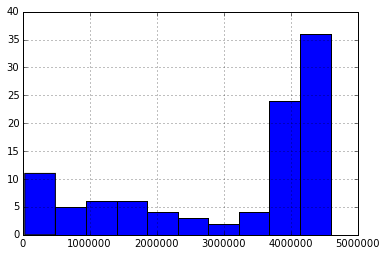

In [12]:
%matplotlib inline

pandas_df["total"] = pandas_df["total"].astype(float)
pandas_df["total"].hist()